<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/Programs%20in%20Tensorflow/Computervision_on_catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Downloading the Data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-15 01:18:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  33.3MB/s    in 2.0s    

2020-07-15 01:18:30 (33.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



***The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation subdirectories for the training and validation datasets which in turn each contain cats and dogs subdirectories.***

In [ ]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

*** Let's define each of these directories:***

In [ ]:
#defining the directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')


In [ ]:
#Directory with our training cat and dog pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')

#Directory with our validation cat and dog pictures
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dog_dir = os.path.join(validation_dir,'dogs')

In [ ]:
#seeing filenames of cats and dogs in training dir
train_cats_fname = os.listdir(train_cat_dir)
print(train_cats_fname)
train_dogs_fname = os.listdir(train_dog_dir)
print(train_dogs_fname)

['cat.357.jpg', 'cat.517.jpg', 'cat.366.jpg', 'cat.60.jpg', 'cat.732.jpg', 'cat.164.jpg', 'cat.995.jpg', 'cat.247.jpg', 'cat.863.jpg', 'cat.285.jpg', 'cat.0.jpg', 'cat.107.jpg', 'cat.955.jpg', 'cat.906.jpg', 'cat.234.jpg', 'cat.186.jpg', 'cat.803.jpg', 'cat.821.jpg', 'cat.848.jpg', 'cat.483.jpg', 'cat.508.jpg', 'cat.753.jpg', 'cat.504.jpg', 'cat.132.jpg', 'cat.37.jpg', 'cat.429.jpg', 'cat.5.jpg', 'cat.38.jpg', 'cat.172.jpg', 'cat.924.jpg', 'cat.427.jpg', 'cat.204.jpg', 'cat.689.jpg', 'cat.558.jpg', 'cat.645.jpg', 'cat.413.jpg', 'cat.388.jpg', 'cat.24.jpg', 'cat.851.jpg', 'cat.113.jpg', 'cat.680.jpg', 'cat.12.jpg', 'cat.111.jpg', 'cat.323.jpg', 'cat.861.jpg', 'cat.53.jpg', 'cat.94.jpg', 'cat.779.jpg', 'cat.896.jpg', 'cat.377.jpg', 'cat.420.jpg', 'cat.489.jpg', 'cat.603.jpg', 'cat.742.jpg', 'cat.320.jpg', 'cat.708.jpg', 'cat.639.jpg', 'cat.810.jpg', 'cat.137.jpg', 'cat.926.jpg', 'cat.668.jpg', 'cat.412.jpg', 'cat.446.jpg', 'cat.534.jpg', 'cat.652.jpg', 'cat.628.jpg', 'cat.971.jpg', 'cat.

In [ ]:
#seeing filenames of cats and dogs in validation dir
validation_cats_fname = os.listdir(validation_cat_dir)
print(validation_cats_fname)
validation_dogs_fname = os.listdir(validation_dog_dir)
print(validation_dogs_fname)

['cat.2307.jpg', 'cat.2240.jpg', 'cat.2086.jpg', 'cat.2317.jpg', 'cat.2209.jpg', 'cat.2203.jpg', 'cat.2445.jpg', 'cat.2481.jpg', 'cat.2341.jpg', 'cat.2426.jpg', 'cat.2012.jpg', 'cat.2308.jpg', 'cat.2390.jpg', 'cat.2394.jpg', 'cat.2146.jpg', 'cat.2304.jpg', 'cat.2033.jpg', 'cat.2069.jpg', 'cat.2453.jpg', 'cat.2345.jpg', 'cat.2468.jpg', 'cat.2099.jpg', 'cat.2160.jpg', 'cat.2129.jpg', 'cat.2298.jpg', 'cat.2489.jpg', 'cat.2150.jpg', 'cat.2343.jpg', 'cat.2027.jpg', 'cat.2412.jpg', 'cat.2360.jpg', 'cat.2268.jpg', 'cat.2421.jpg', 'cat.2015.jpg', 'cat.2070.jpg', 'cat.2029.jpg', 'cat.2127.jpg', 'cat.2300.jpg', 'cat.2200.jpg', 'cat.2466.jpg', 'cat.2088.jpg', 'cat.2038.jpg', 'cat.2293.jpg', 'cat.2351.jpg', 'cat.2282.jpg', 'cat.2132.jpg', 'cat.2420.jpg', 'cat.2410.jpg', 'cat.2032.jpg', 'cat.2439.jpg', 'cat.2316.jpg', 'cat.2312.jpg', 'cat.2288.jpg', 'cat.2214.jpg', 'cat.2021.jpg', 'cat.2254.jpg', 'cat.2424.jpg', 'cat.2485.jpg', 'cat.2061.jpg', 'cat.2056.jpg', 'cat.2434.jpg', 'cat.2001.jpg', 'cat.20

In [ ]:
#Finding total number of cats and dogs images in both the directories
print("no of train_cat",len(os.listdir(train_cat_dir)))
print("no of train_dog",len(os.listdir(train_dog_dir)))
print("no of validation_cat",len(os.listdir(validation_cat_dir)))
print("no of validation_dog",len(os.listdir(validation_dog_dir)))

no of train_cat 1000
no of train_dog 1000
no of validation_cat 500
no of validation_dog 500


In [91]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

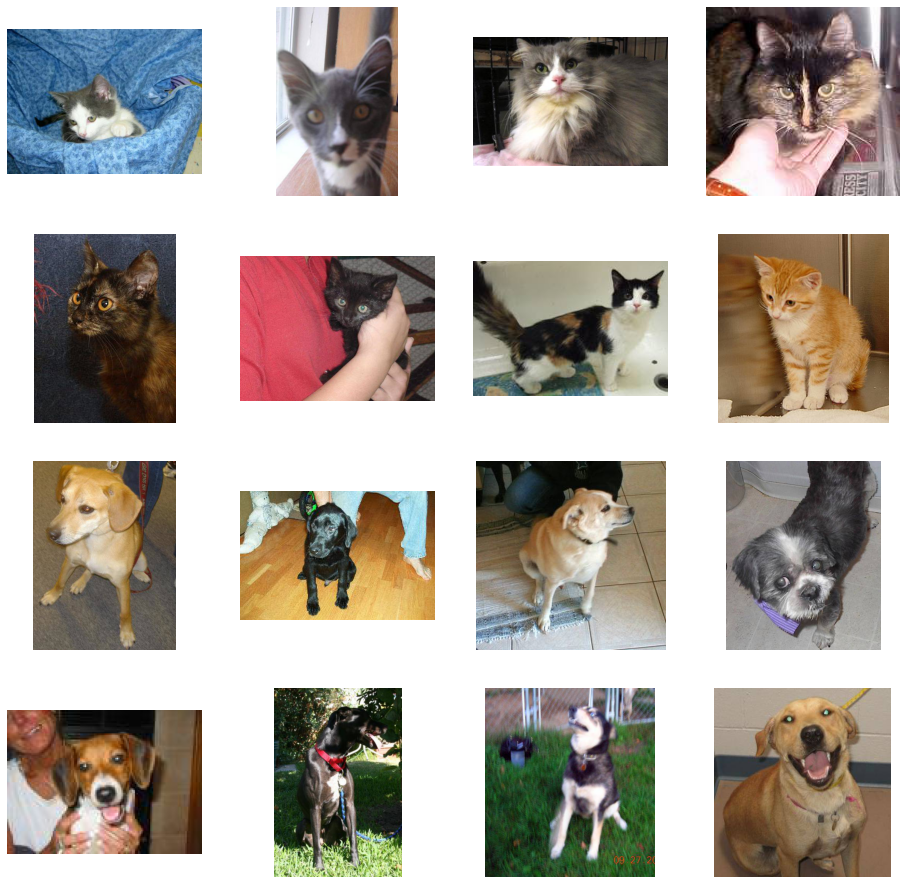

In [92]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

#plt.show()


In [93]:
'''
from tensorflow.keras.preprocessing.image import img_to_array,load_img

img = load_img(img_path,target_size = (150,150))
print(type(img))
X = img_to_array(img)
print(type(X),X.shape)
#Rescale
X = X.reshape((1,)+X.shape)
X = X/255.0
print(X.shape)
'''

'\nfrom tensorflow.keras.preprocessing.image import img_to_array,load_img\n\nimg = load_img(img_path,target_size = (150,150))\nprint(type(img))\nX = img_to_array(img)\nprint(type(X),X.shape)\n#Rescale\nX = X.reshape((1,)+X.shape)\nX = X/255.0\nprint(X.shape)\n'

In [101]:
#Scaling the image to (150x150x3)

from tensorflow.keras.preprocessing.image import img_to_array,load_img
X_train = []
# Set up matplotlib fig, and size it to fit 4x4 pics
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[0:]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[0:]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  img = mpimg.imread(img_path)
  img = load_img(img_path,target_size = (150,150))
  X_train.append( img_to_array(img))

#preprocessed training data of 2000 example which contain dogs and cats both
X_train = np.asarray(X_train)
print("X_train.shape",X_train.shape)

#Rescale the training examples
X_train = X_train/255.0
#print(X_train.shape)



X_train.shape (2000, 150, 150, 3)


In [107]:
Y = []
for i in range(0,len(os.listdir(train_cat_dir)*2)):
  if i < len(os.listdir(train_cat_dir)):
    Y.append(1)
  else:
    Y.append(0)

Y = np.asarray(Y)

print(Y.shape)

(2000,)


In [108]:
#Defining the Convolution model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (150,150,3)),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [109]:
model.summary()
model.compile(optimizer = tf.optimizers.Adam(), loss= 'binary_crossentropy',metrics = ['acc'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(X_train,Y,epochs = 50)

Epoch 1/50
63/63 [==============================] - 3s 53ms/step - loss: 5.3046 - acc: 0.5120
Epoch 2/50
63/63 [==============================] - 3s 52ms/step - loss: 1.5692 - acc: 0.5600
Epoch 3/50
63/63 [==============================] - 3s 53ms/step - loss: 1.0010 - acc: 0.5820
Epoch 4/50
63/63 [==============================] - 3s 53ms/step - loss: 1.0751 - acc: 0.5965
Epoch 5/50
63/63 [==============================] - 3s 52ms/step - loss: 1.1558 - acc: 0.5910
Epoch 6/50
63/63 [==============================] - 3s 52ms/step - loss: 0.9480 - acc: 0.6340
Epoch 7/50
63/63 [==============================] - 3s 52ms/step - loss: 1.2531 - acc: 0.6105
Epoch 8/50
63/63 [==============================] - 3s 52ms/step - loss: 1.1326 - acc: 0.6195
Epoch 9/50
63/63 [==============================] - 3s 53ms/step - loss: 0.9814 - acc: 0.6370
Epoch 10/50
63/63 [==============================] - 3s 52ms/step - loss: 0.8022 - acc: 0.6820
Epoch 11/50
63/63 [==============================] - 3s 52m

In [114]:
#Plot Loss and Accuracy
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

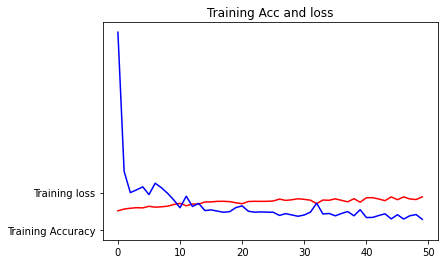

<Figure size 432x288 with 0 Axes>

In [115]:
#Creating List
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

#Plot the graph
plt.plot(epochs,acc,'r',"Training Accuracy")
plt.plot(epochs,loss,'b',"Training loss")
plt.title("Training Acc and loss")
plt.figure()


[1.]
It is a cat
[1.]
It is a cat
[1.]
It is a cat
[1.]
It is a cat
[1.]
It is a cat
[1.]
It is a cat
[0.01157609]
It is a dog
[1.]
It is a cat
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog
[0.]
It is a dog


'\nX = X.reshape((1,)+X.shape)\nX = X/255.0\nprint(X.shape)\n'

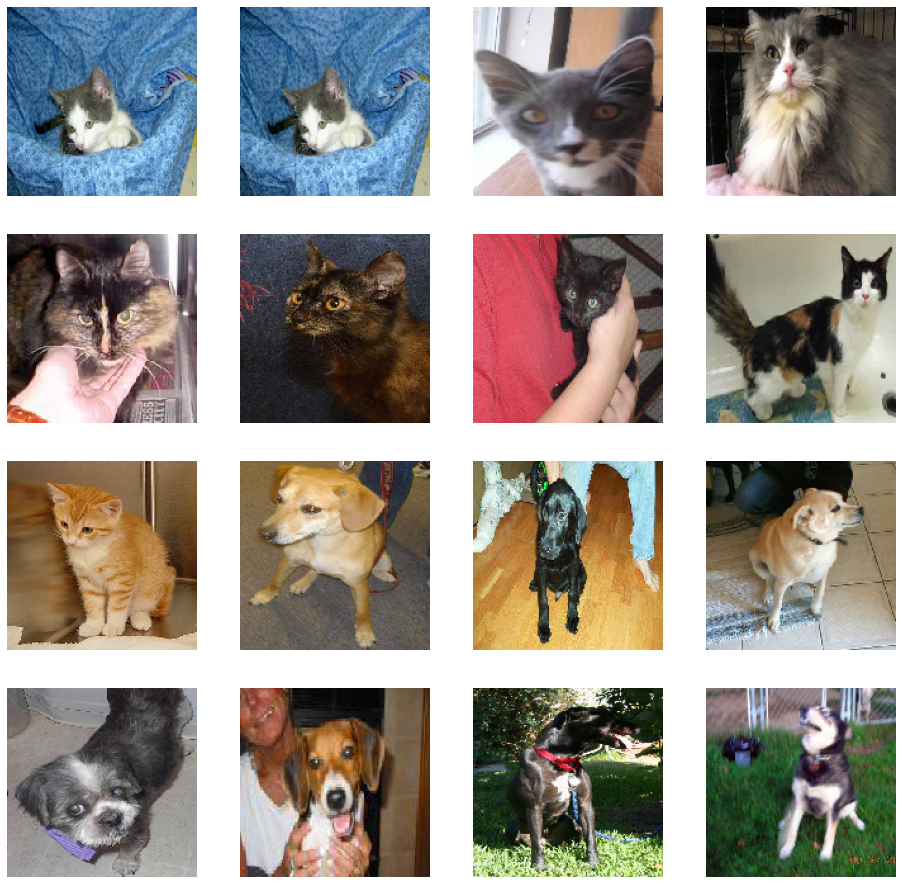

In [113]:
#Predicting the images in the dataset
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cats_fname[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dogs_fname[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(img)

  img = mpimg.imread(img_path)
  img = load_img(img_path,target_size = (150,150))  
  X = img_to_array(img)  
  X = np.expand_dims(X,axis = 0)
  X = X.reshape((1,)+X.shape)
  images = np.vstack(X)
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5 :
    print("It is a cat")
  else:
    print('It is a dog')
  






#Rescale
'''
X = X.reshape((1,)+X.shape)
X = X/255.0
print(X.shape)
'''